# Parcial 2

## Isabel Piedrahíta

$ g(x) = e^{x-10.5} + sin(x) + x^3 - x $

$ f(x) = g(x) - x $

# Funciones

### A. Argumente si la función $ g(x) $ cumple o no con las condiciones del teorema de punto fijo en $ [0, 1.1] $ y de el valor de $ k $.

1) Continuidad: Podemos asegurar que $ g(x)$ es continua ya que está compuesta de funciones continuas, no hay ningún punto de esta función en el que un valor de $ x $ no tenga un correspondiente $ g(x) $. 

2) Para tofo $ x \in [a, b]$ se cumple que $ g(x) \in [a, b]$: Haremos esto de forma gráfica, comprobando en geogebra que la función está contenida dentro de un cuadrado acotado por 0 y 1.1. Acá se pudo comprovar que efectivamente la función cumple este requisito en el intervalo dado.

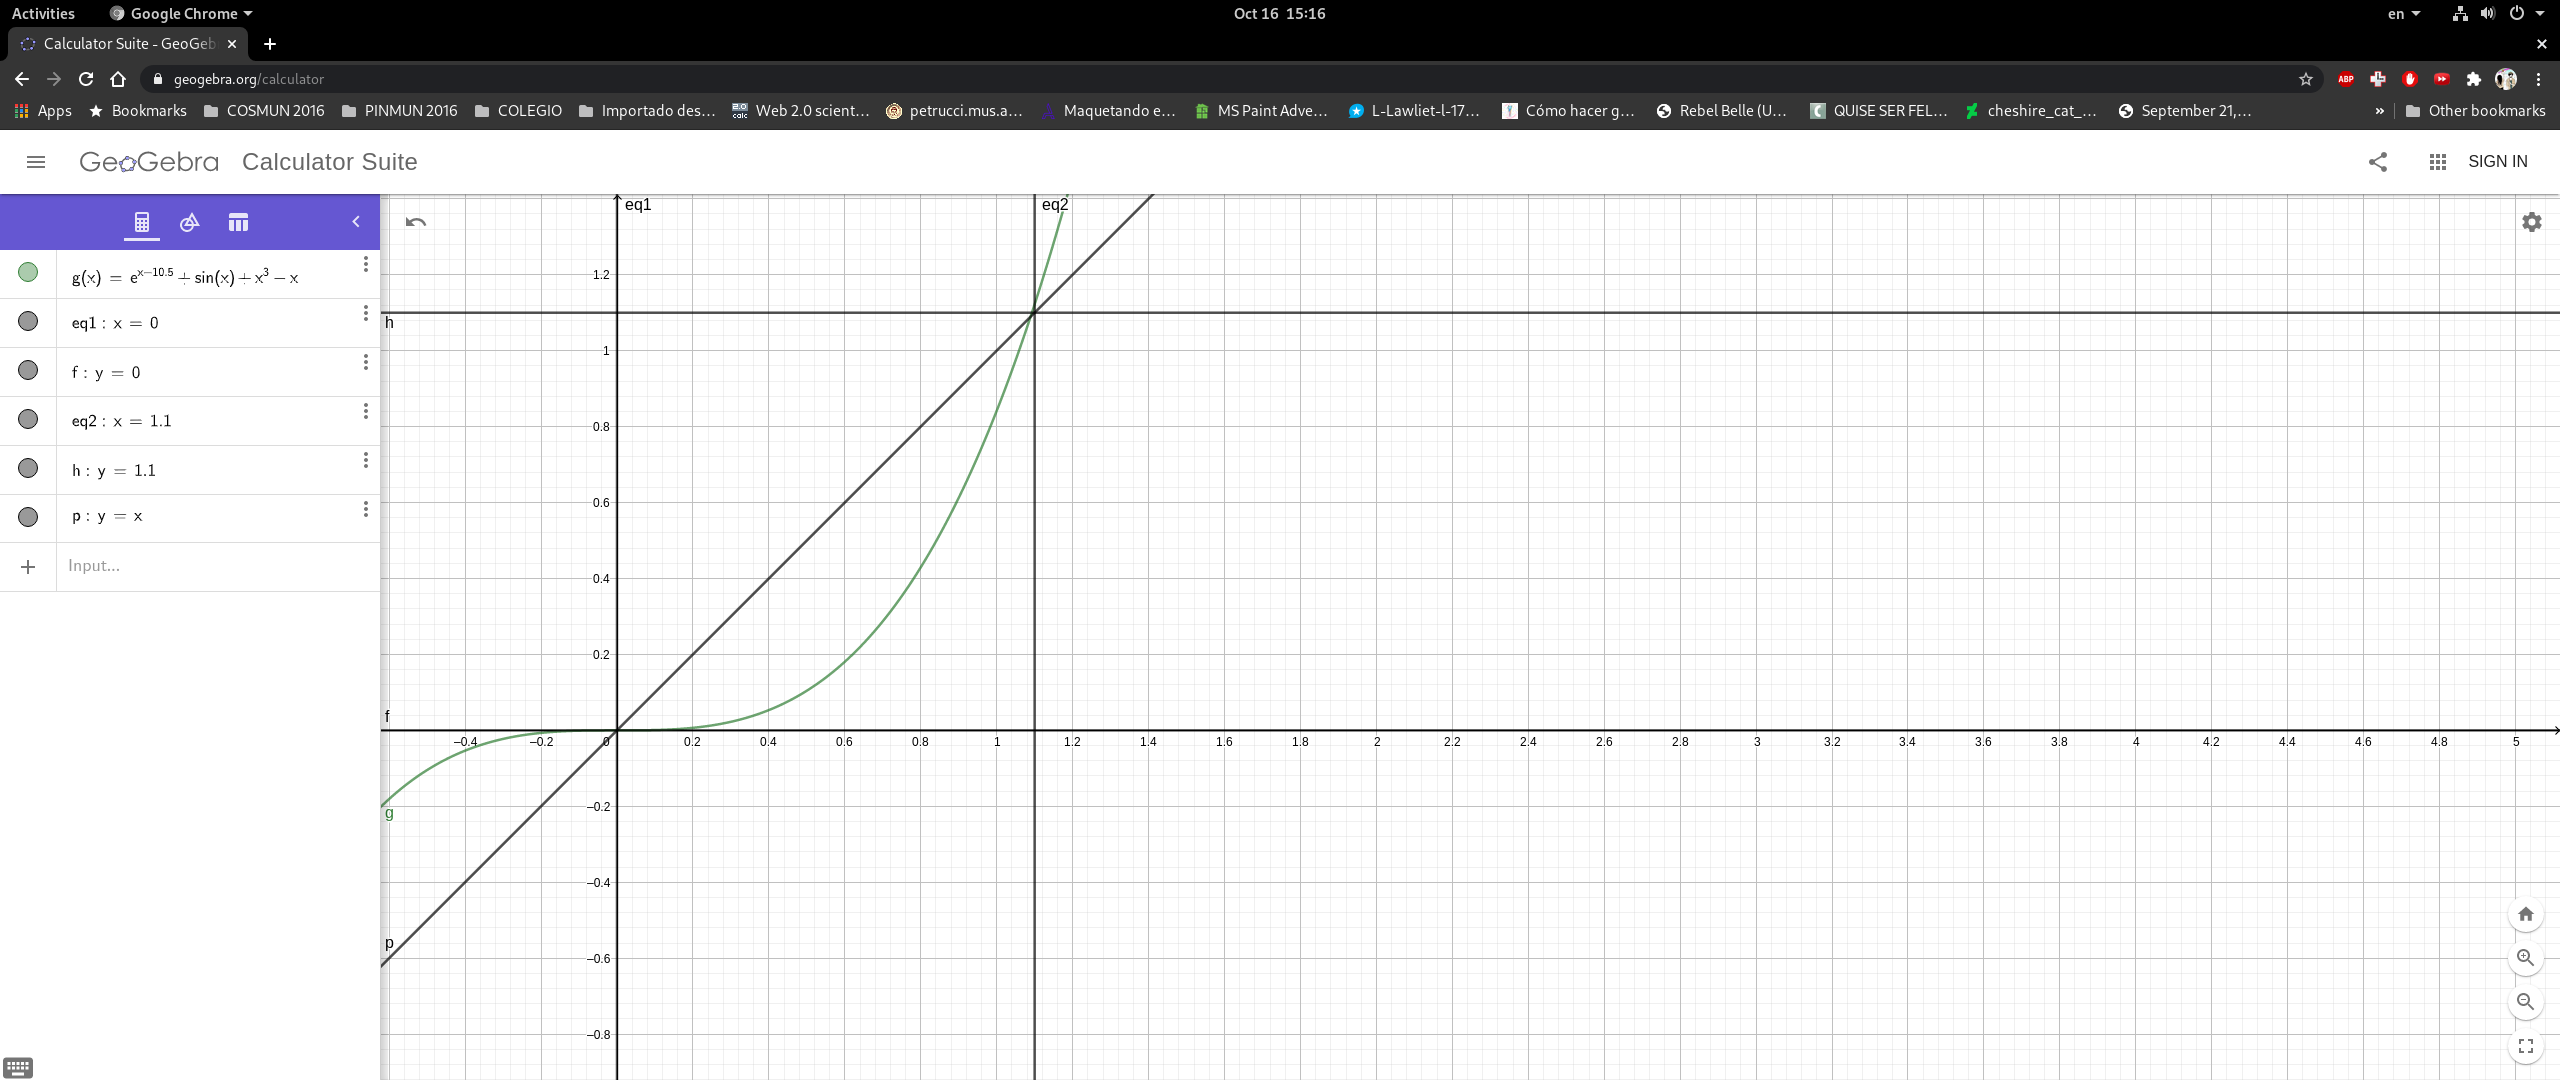

En este punto tenemos suficiente evidencia para demostrar que existe al menos un punto fijo, pero hay una tercera propiedad que demostrará que solo existe uno en este intervalo. Para verificar esto, debemos calcular el valor de $k$. Haremos esto en geogebra calculando el valor absoluto de la derviada de $ g(x)$ y despues calculando el máximo del valor absoluto de la derivada en el intervalo dado.

Hallamos tras este procedimiento que $ k = 3.08 $.

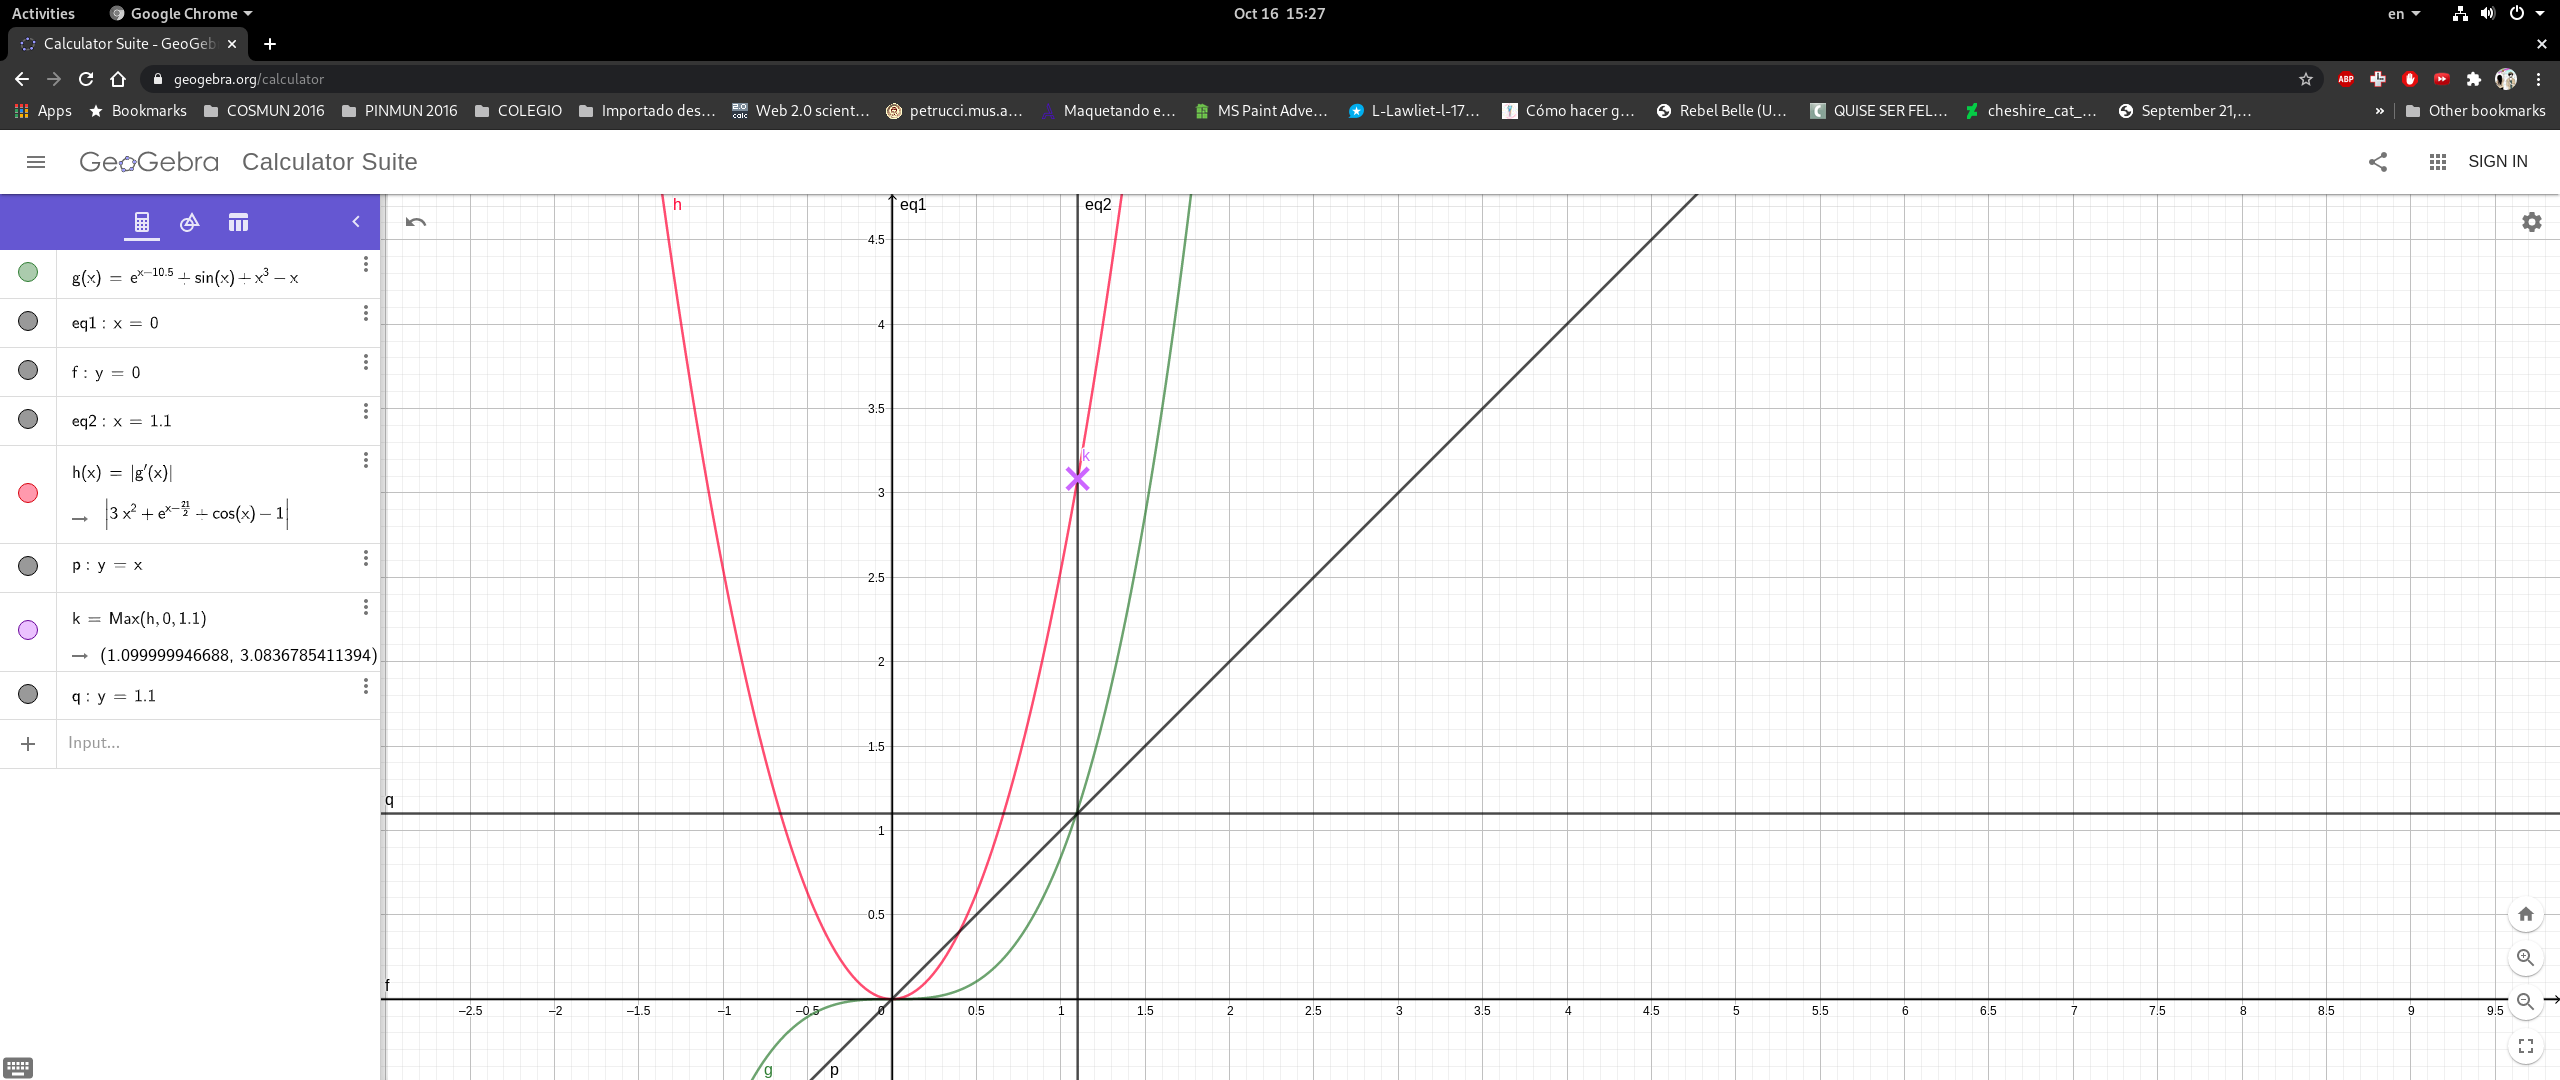

3) $|g'(x)|$ existe en $(a,b)$ y $|g'(x) \leq k < 1|$: Esta propiedad no se cumple, ya que $k$ es mayor que 1, por lo que no podemos decir que hay solo un punto fijo, lo cual concuerda con la gráfica hecha, ya que se ve que $g(x)$ cruza la linea $y=x$ dos veces, una cerca de $(0, 0)$ y otra cerca de $(1.1, 1.1)$

Por tanto, podemos concluir que $g(x)$ no cumple el teorema de existencia de punto fijo, pero no el de unicidad de punto fijo en el intervalo $[0, 1.1]$.

### B. Corra el método y de la información de la última fila.

Linea de la tabla:

| 6 | 1.089 | 3.536458e-07 | 0.000002

A continuación está el procedimiento.

In [22]:
import math
import pandas as pd

In [23]:
def metodo_parcial(f, f_derivate, f_second_derivate, x0, tolerance, max_iterations):
    n = 0
    
    # NOOOO
    alpha = 2
    # NOOOO
    
    pd.set_option("display.precision", 6)
    data = {'n': [n],
            'Xn': [x0],
            'f(x)': [f(x0)],
            'f\'(x)': [f_derivate(x0)],
            'f\'\'(x)':[f_second_derivate(x0)],
            'E': [None],}
    output = pd.DataFrame(data)
    
    while n < max_iterations:
        n += 1
        
        x1 = x0 + ((f(x0)*f_derivate(x0)-math.pow(f(x0),4))/(f_derivate(x0)-f_second_derivate(x0)+math.pow(f(x0),2)))
        err = abs(x1 - x0)
        x0 = x1
        
        new_line = {'n':n,
                    'Xn': x1,
                    'f(x)':f(x1),
                    'f\'(x)': f_derivate(x1),
                    'f\'\'(x)':f_second_derivate(x1),
                    'E':err,}
        output = output.append(new_line, ignore_index=True)
        
        print(output.loc[n,"E"]/math.pow(output.loc[n-1,"E"],alpha))
        
        if err <= tolerance:
            break
            
        
        
    print (output)

Vamos a correr el método propuesto en la función $f(x) = g(x) - x$ con $x_0 = 1$ y $tolerance = 0.00001$ con un máximo de 100 iteraciones.

In [24]:
# Declaramos una función que retorne el valor de f(x)

def f(x):
    return math.exp(x - 10.5) + math.sin(x) + math.pow(x, 3) - x - x

In [4]:
# Declaramos una función que retorne el valor de la primera derivada de f(x)

def f_der(x):
    return 3*math.pow(x,2) + math.exp(x-10.5) + math.cos(x) - 2

In [7]:
# Declaramos una función que retorne el valor de la segunda derivada de f(x)

def f_der_der(x):
    return math.exp(x-10.5)- math.sin(x) + 6*x

In [9]:
# Corremos el método propuesto con los valores dados

metodo_parcial(f, f_der, f_der_der, 1, 0.00001, 100)

nan
4.6757380306364755
1.5645086231439462
176.72973863977916
1327.0853995264933
10482.28968898656
     n        Xn          f(x)     f'(x)    f''(x)         E
0  0.0  1.000000 -1.584542e-01  1.540377  5.158604       NaN
1  1.0  1.068105 -4.129491e-02  1.904411  5.532421  0.068105
2  2.0  1.089793  1.317415e-03  2.025694  5.652306  0.021687
3  3.0  1.089057 -1.716843e-04  2.021537  5.648232  0.000736
4  4.0  1.089152  2.179782e-05  2.022077  5.648761  0.000096
5  5.0  1.089140 -2.777060e-06  2.022009  5.648694  0.000012
6  6.0  1.089142  3.536458e-07  2.022017  5.648703  0.000002


### C. Corra el método de punto fijo con $x_0 = 1$ y tolerancia de $10^{-5}$, con un máximo de 100 iteraciones.

La última fila:

| 6 | 0.0000275372 | -0.0000000271 | 0.0000000271 |

A continuación está el procedimiento.

In [10]:
def fixed_point(f, g, x0, tolerance, max_iterations):
    current_aproximation = x0
    current_f = f(current_aproximation) 
    n = 0
    
    # We create a data frame in which we will sotre the obtained values, to create the method chart
    pd.set_option("display.precision", 10)
    data = {'n': [n],
            'Xn': [current_aproximation],
            'f(x)': [current_f],
            'E': [None]}
    output = pd.DataFrame(data)
    
    while (n < max_iterations):
        n += 1
        
        current_f = f(current_aproximation)
        previous_aproximation = current_aproximation
        current_aproximation = g(previous_aproximation)
        err = abs(current_aproximation - previous_aproximation)
        
        new_line = {'n':n,
                    'Xn': current_aproximation,
                    'f(x)':current_f,
                    'E':err}
        output = output.append(new_line, ignore_index=True)
        
        if err <= tolerance:
            break
            
    print(output)

In [11]:
# Declaramos una función que retorne los valores de g(x), la de f(x) ya está implementada en el punto anterios

def g(x):
    return math.exp(x - 10.5) + math.sin(x) + math.pow(x, 3) - x

In [12]:
fixed_point(f, g, 1, 0.00001, 100)

     n            Xn          f(x)             E
0  0.0  1.0000000000 -0.1584541634           NaN
1  1.0  0.8415458366 -0.1584541634  0.1584541634
2  2.0  0.5001743174 -0.3413715192  0.3413715192
3  3.0  0.1045803833 -0.3955939341  0.3955939341
4  4.0  0.0009838444 -0.1035965389  0.1035965389
5  5.0  0.0000275643 -0.0009562800  0.0009562800
6  6.0  0.0000275372 -0.0000000271  0.0000000271


### D. Analice los resultados obtenidos.

Vemos que el método de punto fijo nos llevó a la raíz más lejana del valor inicial, esto probablemente se debe a que $g(x)$ no cumplia el teorema de unicidad de punto fijo, por lo que los resultados encontrados en C tienen sentido con respecto a los encontrados en A. Por otro lado, el método nuevo nos llevó a la raíz más cercana al punto inicial dado, que asumiendo que es una variación de el método de raices múltiples (debido a que también usa la primera y la segunda derivada), se comportó de la forma esperada.

En cuestiones de la velocidad de convergencia, podríamos asumir que en muchas situaciones el método nuevo convergerá más rápiso que el método de punto fijo, ya que no bajará su velocidad de convergencia al encontrar una raíz múltiple. En este caso abos se comportaron de casi igual manera ya que ninguna de las raices era multiple.

# Matrices

Considerando el siguiente sistema matricial

$\begin{pmatrix}
4 & 2 & 1\\
1.69 & 1.3 & 1\\
2.6 & 1 & 0
\end{pmatrix}$
$\begin{pmatrix}
a\\
b\\
c
\end{pmatrix}$
$ = $
$\begin{pmatrix}
1\\
0\\
0
\end{pmatrix}$

### Resuelvalo usando eliminación Gaussiana con pivoteo total, entregue la matriz en la última etapa.

[[ 4.          1.          2.          1.        ]

 [ 0.         -0.65       -0.3        -0.65      ]
 
 [ 0.          0.          0.18846154 -1.        ]]
 
 a = 2.040816	b = -5.306122	c = 3.448980
 
 El procedidmiento está abajo.
 
 ### Argumente si la función $f(x) = ax^2 + bx + c = 2.040816x^2 + -5.306122x + 3.448980$ cumple el teorema de existencia y unicidad de raices en $[0, 2]$
 
Al ser una función compuesta de funciones continuas, sabemos que es continua en el intervalo dado.  Al realizar la multiplicación $ f(a) * f(b)$ vemos que el resultado es un número positivo, que era de esperarce, ya que esta función es una parabola cuyo vertice está dentro del intervalo y en el eje x, por lo que los límites del intervalo tendrán los mismos signos. Esto ya es suficiente información para concluir que no cumple con el teorema de unicidad y existencia de la raíz. Sin embargo, sabiendo que es una parabola cuyo vertice está en el intervalo, es claro que tampoco se cumple el tercer requisito, pues al estar dentro del intervalo el mínimo global la deribada de la función claramente cambiará de signo.

### Que sucede si se corre el método de Newton en $f(x)$ con $x_0 = 0.55$ y tolerancia de $10^{-5}$ con un máximo de 100 iteraciones.

Al correr el método vemos que llega hasta el máximo de iteraciones. Este no es el comportamiento esperado del método, esto se debe a que la aproximación inicial es muy cercana a un mínimo de la función, por lo que la derivada se acercará a 0, haciendo que la convergencia sea más lenta de lo esperado y que el método no logre alcanzar el valor deseado. Vemos que x si se está aproximando al valor real de la raiz, pero aún hay mucho error el la iteración 100, por lo que no podemos afirmar que se obtenga la convergencia deseada.

El procedimiento está abajo.

### A. (10%) Resuelva el sistema usando el método de eliminación gaussiana con pivoteo total. Entregue la matriz de la última etapa. 

In [13]:
import numpy as np

In [14]:
def pivot_gauss(n, augmented_matrix):
    # Applying Gauss Elimination
    x = np.zeros(n)
    swapping_list = []
    
    for i in range(n):
        
        largest = 0
        row_of_largest = 0
        column_of_largest = 0
        for j in range (i, n):
            for k in range (n):
                if abs(largest) < abs(augmented_matrix[j][k]):
                    largest = augmented_matrix[j][k]
                    row_of_largest = j
                    column_of_largest = k
                    #print (f'largest = {largest}, column = {column_of_largest}, row = {row_of_largest}')
                    
        if(row_of_largest != i or column_of_largest != i):
            augmented_matrix[[row_of_largest, i]] = augmented_matrix[[i, row_of_largest]]
            swap = [column_of_largest, i]
            swapping_list.append(swap)
            augmented_matrix[:,[i, int(column_of_largest)]] = augmented_matrix[:,[int(column_of_largest),i]]
        
        for j in range(i,n): 
            if abs(augmented_matrix[j][i]) > abs(augmented_matrix[i][i]):  
                augmented_matrix[[i,j]] = augmented_matrix[[j,i]]
            else: 
                pass  
        print(f'Pivot Etapa {i} \n{augmented_matrix}')
            
        if augmented_matrix[i][i] == 0.0:
            return None #Results in division by 0

        for j in range(i+1, n):
            ratio = augmented_matrix[j][i]/augmented_matrix[i][i]
            
            #print(augmented_matrix)
            
            for k in range(n+1):
                augmented_matrix[j][k] = augmented_matrix[j][k] - ratio * augmented_matrix[i][k]
                
        print(f'Operate Etapa {i} \n{augmented_matrix}')   
                
    # Back Substitution
    x[n-1] = augmented_matrix[n-1][n]/augmented_matrix[n-1][n-1]

    for i in range(n-2,-1,-1):
        x[i] = augmented_matrix[i][n]

        for j in range(i+1,n):
            x[i] = x[i] - augmented_matrix[i][j]*x[j]

        x[i] = x[i]/augmented_matrix[i][i]
    
    for i in reversed(range (len(swapping_list))):
        x[swapping_list[i][0]], x[swapping_list[i][1]] = x[swapping_list[i][1]], x[swapping_list[i][0]]
        print(x)
        
    # Displaying solution
    print('\nRequired solution is: ')
    for i in range(n):
        print('X%d = %f' %(i,x[i]), end = '\t')

In [15]:
matriz_aumentada = np.array([[4, 2, 1, 1], [1.69, 1.3, 1, 0], [2.6, 1, 0, 0]], float)

A = np.array([[4, 2, 1], [1.69, 1.3, 1], [2.6, 1, 0]], float)
b = np.array([[1],[0],[0]], float)
np.linalg.solve(A,b)

array([[ 2.04081633],
       [-5.30612245],
       [ 3.44897959]])

In [16]:
pivot_gauss(3, matriz_aumentada)

Pivot Etapa 0 
[[4.   2.   1.   1.  ]
 [1.69 1.3  1.   0.  ]
 [2.6  1.   0.   0.  ]]
Operate Etapa 0 
[[ 4.      2.      1.      1.    ]
 [ 0.      0.455   0.5775 -0.4225]
 [ 0.     -0.3    -0.65   -0.65  ]]
Pivot Etapa 1 
[[ 4.      1.      2.      1.    ]
 [ 0.     -0.65   -0.3    -0.65  ]
 [ 0.      0.5775  0.455  -0.4225]]
Operate Etapa 1 
[[ 4.          1.          2.          1.        ]
 [ 0.         -0.65       -0.3        -0.65      ]
 [ 0.          0.          0.18846154 -1.        ]]
Pivot Etapa 2 
[[ 4.          1.          2.          1.        ]
 [ 0.         -0.65       -0.3        -0.65      ]
 [ 0.          0.          0.18846154 -1.        ]]
Operate Etapa 2 
[[ 4.          1.          2.          1.        ]
 [ 0.         -0.65       -0.3        -0.65      ]
 [ 0.          0.          0.18846154 -1.        ]]
[ 2.04081633 -5.30612245  3.44897959]

Required solution is: 
X0 = 2.040816	X1 = -5.306122	X2 = 3.448980	

### C. (8%) ¿Qué sucede al correr el método de Newton conx0=0.55, tolerancia10−5 y 100 como numero máximo de iteraciones?  ¿Es este el comportamiento normal del método? ¿Se obtiene la convergencia deseada?

In [17]:
def newton(f, f_derivate, x0, tolerance, max_iterations):
    n = 0
    
    pd.set_option("display.precision", 8)
    data = {'n': [n],
            'Xn': [x0],
            'f(x)': [f(x0)],
            'f\'(x)': [f_derivate(x0)],
            'E': [None]}
    output = pd.DataFrame(data)
    
    while n < max_iterations:
        if f_derivate(x0) == 0:
            return None
        
        n += 1
        
        x1 = x0 - (f(x0) / f_derivate(x0))
        err = abs(x1 - x0)
        x0 = x1
        
        new_line = {'n':n,
                    'Xn': x1,
                    'f(x)':f(x1),
                    'f\'(x)': f_derivate(x1),
                    'E':err}
        output = output.append(new_line, ignore_index=True)
        
        if err <= tolerance:
            break
            
        
        
    print (output)

In [20]:
# Definimos una nueva función que retorne el valor de la nuevo f(x) y otra para su derivada

def f_2(x):
    return 2.040816*math.pow(x,2) -5.306122 * x + 3.448980

def f_2_prima(x):
    return 4.081632*x - 5.306122

In [21]:
# Corremos Newton con la nueva función

newton(f_2, f_2_prima, 0.55, 0.00001, 100)

         n          Xn        f(x)       f'(x)           E
0      0.0  0.55000000  1.14795974 -3.06122440         NaN
1      1.0  0.92500019  0.28699005 -1.53061161  0.37500019
2      2.0  1.11250043  0.07174762 -0.76530463  0.18750024
3      3.0  1.20625084  0.01793702 -0.38264997  0.09375041
4      4.0  1.25312662  0.00448436 -0.19132029  0.04687578
..     ...         ...         ...         ...         ...
96    96.0  1.30105259  0.00000270  0.00429588  0.00115036
97    97.0  1.30042392  0.00000081  0.00172988  0.00062867
98    98.0  1.29995766  0.00000044 -0.00017323  0.00046626
99    99.0  1.30251882  0.00001339  0.01028050  0.00256116
100  100.0  1.30121666  0.00000346  0.00496556  0.00130216

[101 rows x 5 columns]
